<a href="https://colab.research.google.com/github/M4rck0/Aprendizaje_Automatico/blob/main/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [2]:
# Leer datos
df = pd.read_csv("/content/boston.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
# Definición variables
X = df.drop(columns=["medv"])
y = df["medv"]

In [4]:
# Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [5]:
# Modelo lineal estandarizado
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

In [6]:
# Modelo XGBoost
modelo = XGBRegressor(
        n_estimators=500, # Número de árboles
        learning_rate=0.05, # Tasa de aprendizaje
        max_depth=4, # Profundidad
        subsample=0.8, # Filas
        colsample_bytree=0.8, # Filas
        random_state=42, # Fijar semilla
        objective="reg:squarederror", #MSE
        n_jobs=-1 # Núcleos - 1
)

In [7]:
# Entrenamiendo
pipeline.fit(X_train, y_train)
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [8]:
# Evaluación
y_predict = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f"MAE = {mae}\nRMSE = {rmse}\nR2 = {r2}")

MAE = 1.7279761987573958
RMSE = 5.767691308166725
R2 = 0.9213501464180929


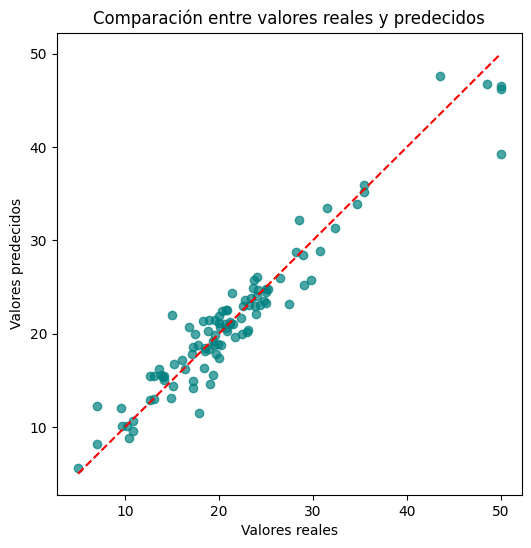

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predict, alpha=0.7, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valores reales")
plt.ylabel("Valores predecidos")
plt.title("Comparación entre valores reales y predecidos")
plt.show()
